# Hopfield Networks
Entirely built from description in the following video: https://www.youtube.com/watch?v=1WPJdAW-sFo&t=1369s&ab_channel=ArtemKirsanov 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
class Network:
    def __init__(self, nos_neurons):
        self.neurons = np.zeros(nos_neurons)
        self.weights = np.zeros((nos_neurons, nos_neurons))
        for i in range(nos_neurons):
            self.weights[i, i] = 0

    def energy(self):
        return -0.5 * np.sum(self.weights * np.outer(self.neurons, self.neurons))
    
    def update_neurons_one_iter(self):
        idx = np.random.randint(len(self.neurons))
        h_i = np.dot(self.weights[idx], self.neurons)
        self.neurons[idx] = 1 if h_i > 0 else -1
    
    def update_neurons_n_iter(self, n, plot = False):
        if plot:
            # Determine iteration steps for 20 evenly spaced plots
            plot_steps = np.linspace(0, n - 1, 20, dtype=int)
            fig, axes = plt.subplots(4, 5, figsize=(10, 8))
            axes = axes.flatten()
            plot_index = 0
        
        energy_values = []
        for i in tqdm(range(n)):
            self.update_neurons_one_iter() 
            energy_values.append(self.energy()) 
            # breaking condition if energy is constant for 10 iterations
            if i > n/2 and len(set(energy_values[-10:])) == 1:
                break
            if plot and i in plot_steps:
                ax = axes[plot_index]
                dimensions = int(np.sqrt(len(self.neurons)))
                ax.imshow(self.neurons.reshape(dimensions, dimensions), cmap='gray')
                ax.set_title(f"Iteration {i+1}")
                ax.axis('off')
                plot_index += 1
        if plot:
            plt.tight_layout()
            plt.show()
            plt.hlines(self.init_energy, 0, len(energy_values), colors='r', linestyles='dashed')
            plt.plot(energy_values)
            plt.xlabel('Iteration')
            plt.ylabel('Energy')
            plt.title('Energy over time')
            plt.show()

    def update_weights_one_iter(self):
        print("Learning Pattern")
        for i in range(len(self.neurons)):
            for j in range(len(self.neurons)):
                if i != j:
                    self.weights[i,j] += self.neurons[i] * self.neurons[j]
        self.weights = (self.weights + self.weights.T) / 2
        self.init_energy = self.energy()
    
    def learn_one_pattern(self, pattern):
        self.neurons = pattern.flatten()
        self.update_weights_one_iter()
    
    def visualize_neurons(self):
        dimensions = int(np.sqrt(len(self.neurons)))
        plt.imshow(self.neurons.reshape(dimensions, dimensions), cmap='gray')
        plt.axis('off')
        plt.show()

    def visualize_weights(self):
        plt.imshow(self.weights, cmap='gray')
        plt.axis('off')
        plt.show()

    def reset_neurons(self):
        self.neurons = np.random.choice([0, 1], len(self.neurons))

In [31]:
def add_noise(pattern, p):
    noisy_pattern = np.copy(pattern)
    # Generate a random matrix of the same shape as the pattern
    noise = np.random.rand(*pattern.shape) < p
    # Flip values where noise is True
    noisy_pattern[noise] = 1 - noisy_pattern[noise]
    return noisy_pattern

def plot_img(img, title):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

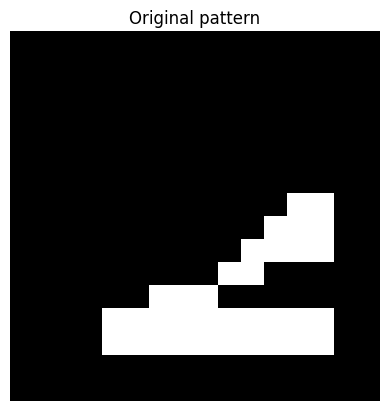

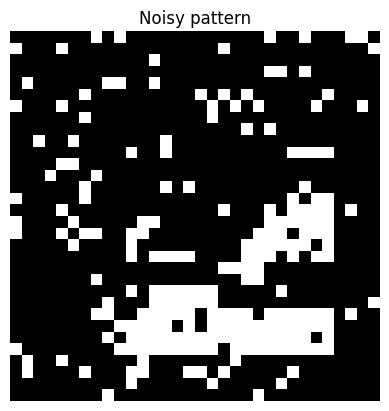

Learning Pattern
energy after learning: -9180.0


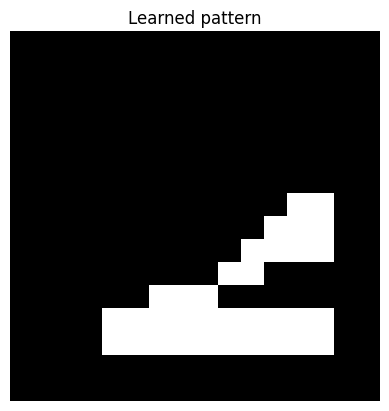

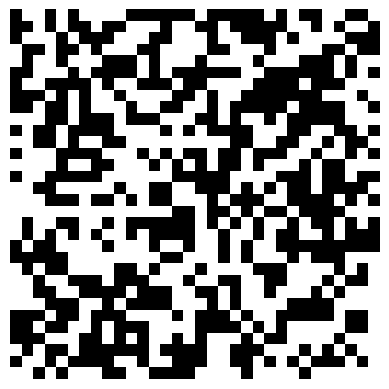

In [38]:
dim = 32
NOS_NEURONS = dim*dim
if NOS_NEURONS**0.5 % 1 != 0:
    raise ValueError("Number of neurons must be a perfect square")
mynet = Network(NOS_NEURONS)

# make a pattern 
# Create a 32x32 grid initialized to 0
dinosaur = np.zeros((32, 32), dtype=int)

# Dinosaur body shape (simplified)
dinosaur[24:28, 8:28] = 1  # body
dinosaur[22:24, 12:18] = 1  # upper legs
dinosaur[26:28, 14:18] = 1  # lower legs
dinosaur[20:22, 18:22] = 1  # tail base

# Dinosaur tail
dinosaur[18:20, 20:28] = 1  # tail part 1
dinosaur[16:18, 22:28] = 1  # tail part 2
dinosaur[14:16, 24:28] = 1  # tail part 3
pattern = dinosaur
plot_img(pattern, 'Original pattern')
# pattern = np.random.choice([-1, 1], NOS_NEURONS, see)
plot_img(add_noise(pattern, 0.1), 'Noisy pattern')
mynet.learn_one_pattern(pattern)
print(f"energy after learning: {mynet.energy()}")   
plot_img(mynet.neurons.reshape(dim, dim), 'Learned pattern')
# mynet.neurons = add_noise(pattern, 0.1).flatten()
mynet.reset_neurons()
mynet.visualize_neurons()


 50%|█████     | 5001/10000 [00:35<00:35, 140.03it/s]


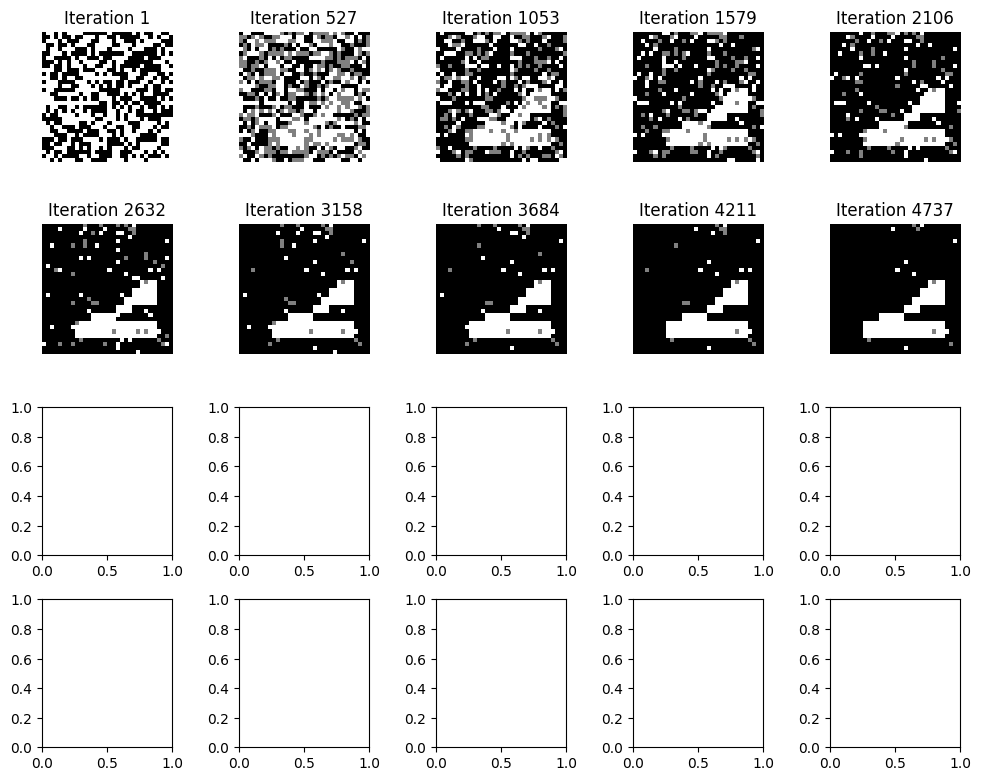

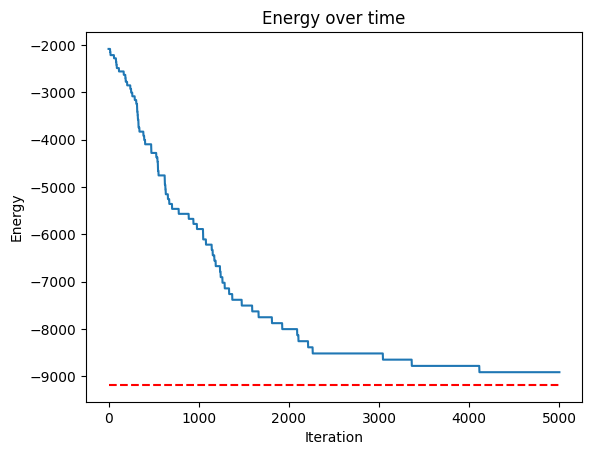

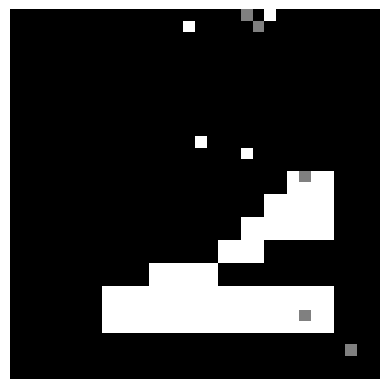

In [39]:

mynet.update_neurons_n_iter(10000, plot=True)    
mynet.visualize_neurons()
